할일 : 반복적으로 파라미터를 비교하는 코드 -> kaggle에서 참고

https://playground.tensorflow.org/   
문제의 종류 :   
  numerical -> regression(+이진분류)->하나의 output neuron,  
  categorical -> classification -> 여러 개의 output neuron

활성화함수  
step : 0과 1만 출력하는 함수  
sigmoid : step함수의 단점인 미분 불가능성을 해결했으며 출력값이 확률로 해석될 수 있음  
hyperbolic tangent : -1부터 1까지 출력하는 함수  
sinx : sinx의 값 즉 -1에서 1까지 출력하는 함수, 비선형적인 문제나 주기를 가지는 문제에 효율이 좋음  
relu : 입력이 양수이면 그대로 출력하고 음수이면 0으로 출력, 비선형적인 문제에 효율이 좋음  

손실함수 : 예측값과 실제값의 차이, 즉 오차를 구하는 함수  
오차의 절댓값의 평균, 평균제곱오차, 원핫벡터를 입력값으로 갖는 교차 엔트로피 함수  
원핫벡터란? categorical 데이터를 벡터로 변환한 것  
A general and Adaptive Robust Loss Function : 다양한 유형의 오차와 이상치에 잘 적응할 수 있는 범용 손실 함수  
AM-LFS 자기강화학습을 이용하여 기존의 손실 함수 중에 최적의 손실함수를 찾는 방식

Gradient Descent(Optimization하는 방법)  
stochastic : 데이터를 여러개로 나누고 반복적으로 학습해서 최적의 가중치를 찾는 것   
adam : 관성을 이용해서 최적의 가중치를 찾는 것, 범용적으로 쓰임  
truncated : 특정 조건을 주어서 원하는 레이어에 대해서만 최적의 가중치를 찾는 것  

CostFunction  
MSE  
Cross-Entropy function : 예측된 확률 분포와 시제 분포 사이의 거리를 측정하는 함수   
+) softmax algorithm : categorical 문제에서 output 뉴런이 여러 개일때 뉴런과 카테고리를 일대일 대응을 시키고 가장 확률이 높은 뉴런을 정답으로 한다.  
Cross validation : n개로 나누고 하나를 제외한 뒤 학습하고 이를 반복한다.  
  
metric  

|실제/예측|Positive예측|Negative 예측|
|:---:|:---:|:---:|
|Postive 실제|True Positive(TP)|False Negative(FN)|
|Negative 실제|False Positive(FP)|True Negative(TN)|

Accuracy(정확도) : 모든 예측 중 올바른 예측,
(TP+TN) / 모든 케이스, 분포가 불균형하면 쓰기 어려움, 100에 하나 있는 경우  
Recall(재현율) : 실제 positive중 예측에 성공한 것, TP / (TP+FN), 암환자인데 암이 없다고 예측하는 오류를 막기 위해 사용    
Precision(정밀도) : 예측 positive 중 실제 positive, TP / (TP+FP). 암환자가 아닌데 암이 있다고 예측하는 오류를 막기 위해 사용  
bmp파일 : 이미지 파일 정보가 그대로 담겨있는 파일 형식  

노드와 은닉층의 수
은닉층의 뉴런 = (입력층의 뉴런의 개수 + 출력층의 뉴런의 개수) / 2  
2의 제곱수로 노드 수를 정한다. -> gpu의 연산 효율 고려  
가운데를 두껍게 만든다.  
1st layer : 8  
2nd layer : 16  
3rd layer : 8  
  
입력 데이터의 양이 적을 때 -> 많은 레이어 수는 문제가 될 수 있음(오버피팅), 노드 수를 늘리고 레이어 수를 줄이는게 도움이 됨  
입력 데이터의 종류가 다양할 때 -> 노드 수 늘리기  
문제 자체가 복잡할 때 -> 레이어 수 늘리기(개-고양이 분류 vs 자율주행)

In [ ]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drice')

Mounted at /content/drice


In [ ]:
path = "/content/drice/MyDrive/ColabDrive/Computer_Vision_Masterclass/Datasets/homer_bart_1.zip"
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
directory = '/content/homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]

In [ ]:
height, width = 128, 128
images = []
classes = []

In [ ]:
for image_path in files:
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue
  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = image.ravel() #matrics to vector
  images.append(image)
  image_name = os.path.basename(os.path.normpath(image_path)) #이미지의 이름만 추출 -> 검색
  #os.path.normpath(image_path) 파일 경로를 python이 읽을 수 있는 형식으로 변환
  #os.path.basename() 파일 경로에서 파일의 기본 이름(파일명) 추출
  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1
  classes.append(class_name)

In [ ]:
X = np.asarray(images)
Y = np.array(classes)

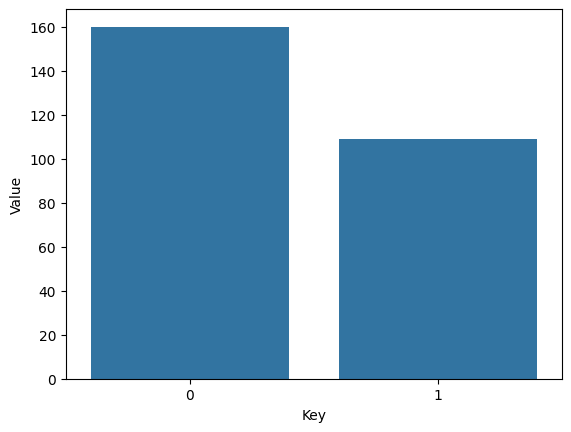

In [ ]:
dict_Y = {k: v for (k, v) in zip(*np.unique(Y, return_counts=True))}
df_Y = pd.DataFrame(dict_Y.items(), columns=['Key', 'Value'])
sns.barplot(x='Key', y='Value', data=df_Y)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #랜덤시드 유지 -> 항상 같게 분류됨

In [ ]:
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units=8193, activation='relu')) #Dense는 한 layer의 뉴런이 다음 layer의 뉴런과 연결됨
#input_shape=() 입력층 뉴런의 개수
#units= 은닉층의 뉴런의 개수
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #2나 3으로도 바꿔서 실행해보기
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy']) #adam, binarycrossentrophy
#크로스엔트로피, accuracy, precise, recall 등에 관한 것
history = network1.fit(X_train, Y_train, epochs=50) #모델을 학습시키고 각 에포크마다 관련된 정보를 기록

Epoch 1/50
7/7 [==============================] - 48s 5s/step - loss: 145.0850 - accuracy: 0.5256
Epoch 2/50
7/7 [==============================] - 23s 3s/step - loss: 13.9005 - accuracy: 0.6186
Epoch 3/50
7/7 [==============================] - 25s 3s/step - loss: 4.7652 - accuracy: 0.5163
Epoch 4/50
7/7 [==============================] - 26s 4s/step - loss: 1.2467 - accuracy: 0.5209
Epoch 5/50
7/7 [==============================] - 24s 3s/step - loss: 0.7623 - accuracy: 0.5488
Epoch 6/50
7/7 [==============================] - 24s 3s/step - loss: 0.7833 - accuracy: 0.6093
Epoch 7/50
7/7 [==============================] - 25s 4s/step - loss: 0.6687 - accuracy: 0.5442
Epoch 8/50
7/7 [==============================] - 25s 4s/step - loss: 0.6777 - accuracy: 0.5860
Epoch 9/50
7/7 [==============================] - 23s 3s/step - loss: 0.6460 - accuracy: 0.6651
Epoch 10/50
7/7 [==============================] - 25s 3s/step - loss: 0.7319 - accuracy: 0.6000
Epoch 11/50
7/7 [===================

dict_keys(['loss', 'accuracy'])


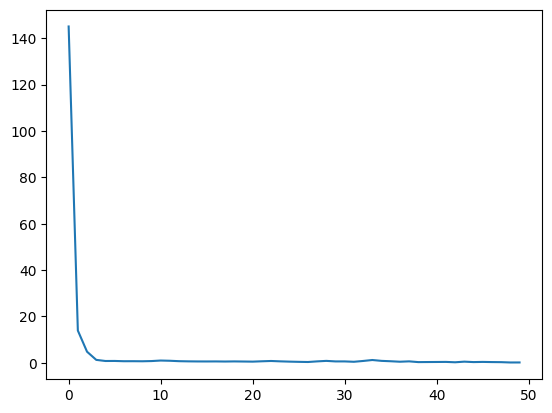

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])

In [ ]:
predictions = network1.predict(X_test)
predictions = (predictions > 0.5)

2/2 [==============================] - 1s 280ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score( Y_test, predictions) #y_test와 prediction 사이의 정답률 출력

0.7037037037037037

<Axes: >

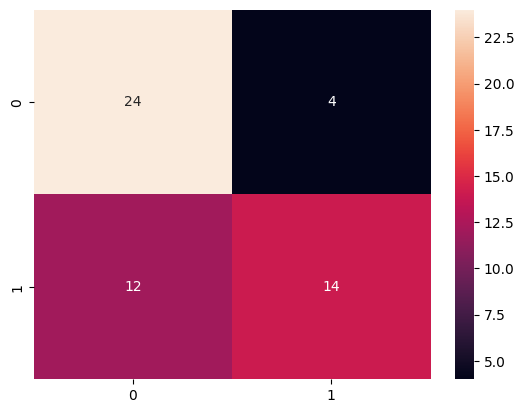

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        28
           1       0.78      0.54      0.64        26

    accuracy                           0.70        54
   macro avg       0.72      0.70      0.69        54
weighted avg       0.72      0.70      0.70        54



In [ ]:
model_json = network1.to_json() #모델의 구조를 json파일의 형식으로 변환
with open('network1.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5') #hdf5 가중치를 저장하는 파일 유형

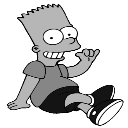

In [ ]:
#단일이미지 분류
test_image = X_test[0]
test_image = scaler.inverse_transform(test_image.reshape(1, -1)) #0과 1로의 정규화를 다시 0과 255의 데이터로 바꿈
#reshape(-1,1)은 -1행과 1열로 재배열하라는 것, -1은 자동이라는 뜻
cv2_imshow(test_image.reshape(width,height))

In [ ]:
##############특성추출############

In [ ]:
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
export = "mouth,pants,shoes,tshirts,shorts,sneakers,class\n"
show_image = True
features = []

In [ ]:
for image_path in file:
  try:
    original_image = cv2.imread(image_path)
    (H,W) = original_image.shape[:2]
  except: continue
  image=original_image.copy()
  image_features =[]
  mouth=pants=shoes=tshirts=shorts=sneakers=0

image_name=os.path.basename(os.path.normpath(image_path))

if image_name.startswith('b'):
  class_name = 0
else:
  class_name = 1